# Аналитика для сети фитнес-центров «Культурист-датасаентист»

#<a name="table_of_contents"></a>
# План: 
1) [Загрузить библиотеки и базы данных.](#stage_1)

    * Посмотреть на сами данные (пропуски, дубликаты, типы данных)
    
2) [Проведите исследовательский анализ данных (EDA)](#stage_2)
- [Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения (пригодится метод describe());](#s_1)
- [Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby());](#s_2)
- [Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);](#s_3)
- [Постройте матрицу корреляций и отобразите её.](#s_4)

---

3) [Постройте модель прогнозирования оттока клиентов](#stage_3)
Постройте модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:
- [Разбейте данные на обучающую и валидационную выборку функцией train_test_split().](#s_5)
- [Обучите модель на train-выборке двумя способами:логистической регрессией,случайным лесом.](#s_6)
- [Оцените метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. Какая модель показала себя лучше на основании метрик?](#s_7)
---

4) [Сделайте кластеризацию клиентов](#stage_4)
- [Cтандартизируйте данные.](#s_8)
- [Постройте матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму. Внимание: отрисовка дендрограммы может занять время! На основании полученного графика предположите, какое количество кластеров можно выделить.](#s_9)
- [Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. Договоримся за число кластеров принять n=5, чтобы ваши результаты можно было сравнивать с результатами остальных студентов. Однако, конечно, в жизни никто не скажет вам правильный ответ, и решение остаётся за вами (на основании изучения графика из предыдущего пункта).](#s_10)
- [Посмотрите на средние значения признаков для кластеров. Можно ли сразу что-то заметить?](#s_11)
- [Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним?](#s_12)
- [Для каждого полученного кластера посчитайте долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?](#s_13)

---
4) [Сформулируйте выводы и сделайте базовые рекомендации по работе с клиентами](#stage_5)


<a name="stage_1"></a>
## ШАГ 1. Загрузка библиотек и баз данных.
[К оглавлению](#table_of_contents)

In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('/datasets/gym_churn.csv')

In [3]:
data.head(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [5]:
data.duplicated().sum()

0

In [6]:
data.isna().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

Пропусков и дубликатов нет, но приведу столбцы к нижнему регистру для удобства

In [7]:
data.columns = [i.lower() for i in data]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
near_location                        4000 non-null int64
partner                              4000 non-null int64
promo_friends                        4000 non-null int64
phone                                4000 non-null int64
contract_period                      4000 non-null int64
group_visits                         4000 non-null int64
age                                  4000 non-null int64
avg_additional_charges_total         4000 non-null float64
month_to_end_contract                4000 non-null float64
lifetime                             4000 non-null int64
avg_class_frequency_total            4000 non-null float64
avg_class_frequency_current_month    4000 non-null float64
churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


<a name="stage_2"></a>
## ШАГ 2. Проведите исследовательский анализ данных (EDA)
[К оглавлению](#table_of_contents)

<a name="s_1"></a>
### Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения (пригодится метод describe());.
[К оглавлению](#table_of_contents)

In [9]:
data.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


* Практически одинаковое соотношение мужчин и женщин - среднее = 51.
* Больше всего людей проживающих вблизи - средне = 84.
* Почти половина посетителей - это партнеры - среднее= 48.
* Чуть меньше четверти приводят друзья - 30%.
* Почти все посетилители оставляют свой номер телефона - 90.
* В среднем 4 месяца.
* Чуть меньше половины посещают групповые занятия - 41.
* По возрасту:
    * Средний возраст - 29.
    * Самый молодой - 18.
    * Самый старший - 41.
* По другим услугам в среднем - 146. (в каких валютах расчитывается не знаю, в рублях доволно мало - поэтому просто условных единиц).
* В среднем у всех осталось по 4 месяца.
* В среднем фитнес посещают по 3.7 месяцев.
* В среднем стараются посещать зал до 2 раз в неделю.
* В предыдущем месяце такой же показатель.
* Отток = 26.

<a name="s_2"></a>
### Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby());.
[К оглавлению](#table_of_contents)

In [10]:
churn_group = data.groupby('churn').mean()

In [11]:
churn_group

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


* По половому признаку почти одинаковое количество оставшихся и ушедших.
* Остаются преимущественно те, кто живет рядом.
* Конечно же остаются партнеры.
* Те кто приходят с друзьями остаются.
* Равное количество тех кто остался и ушел.
* Те кто в фитнес-клубе почти полгода остаются.
* Те кто посещает группове занятия преимущественно остаются.
* Остаются посетители в 29 лет.
* Разница по доп. плата не сильно существенная. 158 (от оставшихся), 115(от ушедших).
* У тех у кого до конца абонемента почти полгода - остаются.
* ОСтаются те кто преимущественно посещает клуб 2 раза в неделю.

Вырисовывается такой психологический портрет потенциального клиента:
29 лет, живут рядом - из-за близости к дому и, скорее всего, занятому образу жизни (всё-таки 26 лет (те кто чаще уходят) постоянно "мигрируют" с места на место) сразу покупает абонимент на год или полгода, а еще если и сотрудник компании-партнера, то еще больше выгоды.

<a name="s_3"></a>
### Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);.
[К оглавлению](#table_of_contents)

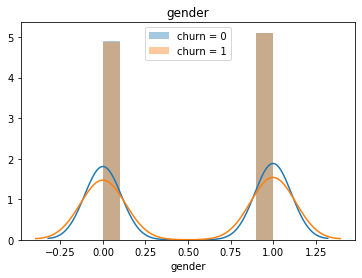

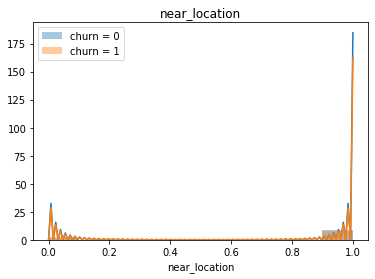

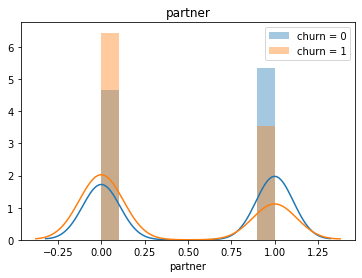

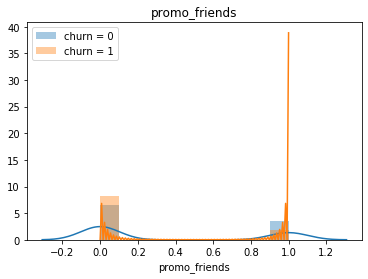

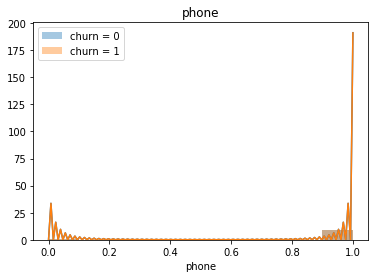

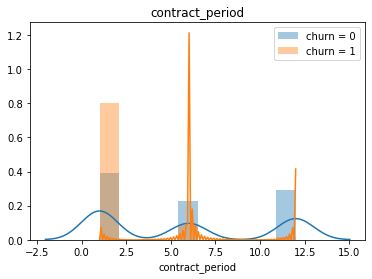

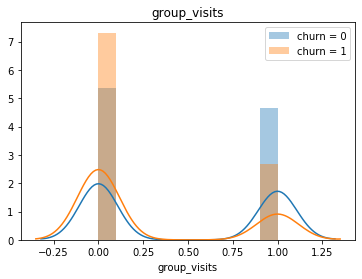

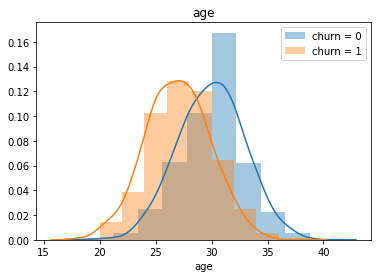

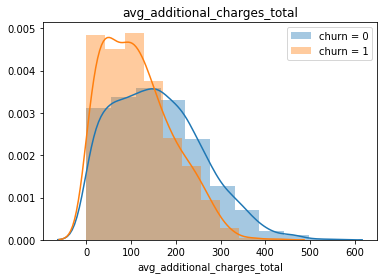

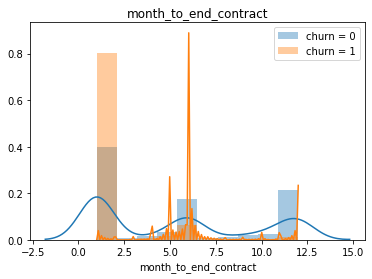

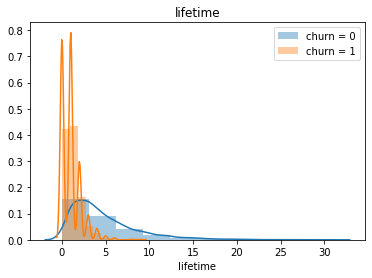

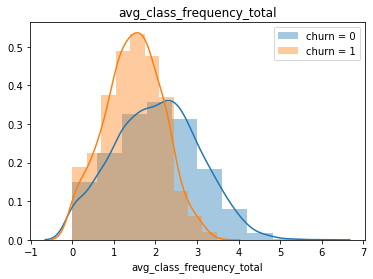

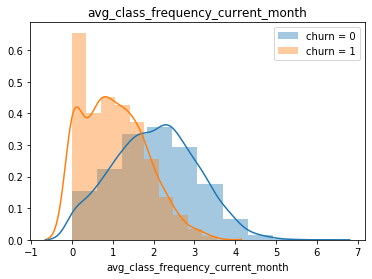

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


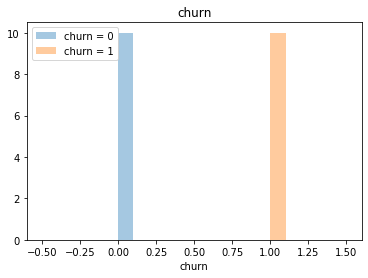

In [12]:
def feat_hist(dataframe, column_to_group, column_to_plot):
 
    for c in column_to_plot:
        for cl in dataframe[column_to_group].unique():
            sns.distplot(dataframe[dataframe[column_to_group]==cl][c], 
                         label='{} = {}'.format(column_to_group, str(cl)), bins = 10)
        plt.title(c)
        plt.legend()
        plt.show()
feat_hist(data, 'churn', data.columns)

Графики подтверждают мои выводы по таблице

<a name="s_4"></a>
### Постройте матрицу корреляций и отобразите её..
[К оглавлению](#table_of_contents)

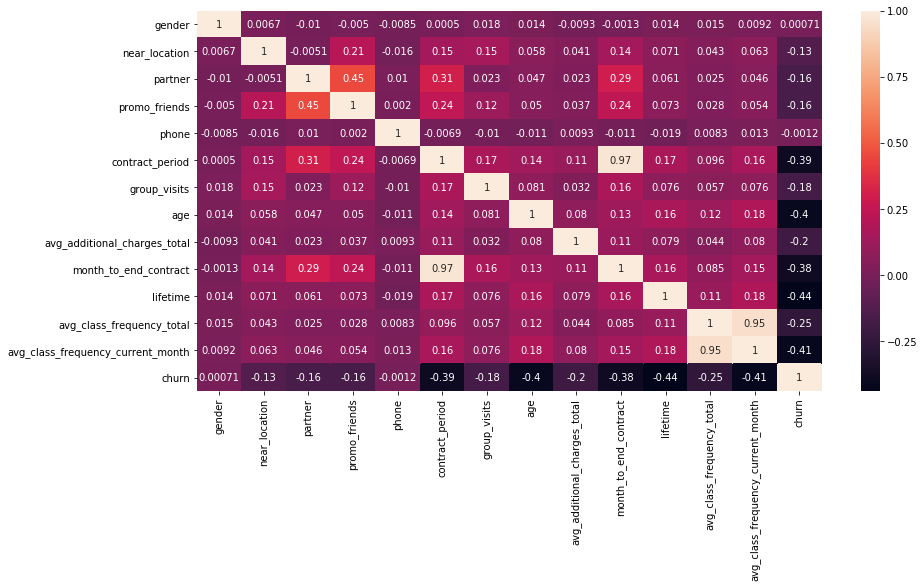

In [13]:
cm = data.corr()
f, ax = plt.subplots(figsize=(14, 7))
ax = sns.heatmap(cm, xticklabels=cm.columns, yticklabels=cm.columns, annot=True);

* Существует влияние от промо от друзей и компаний-партнеров - наверное отношения между коллегами.
* Есть влияние от близости дома и промо от друзей - наверное отношения между соседями.
* Удивительно, что нет сильных корреляций по возрасту клиентов и, например, с близостью дома или походами в фитнес с друзьями.
* Оттока меньше если:
    - Чем больше срок абонемента, тем ниже вероятность оттока.
    - Возраст - чем старше, тем повышается заинтересованность.
    - Постоянность клиента понижает отток.
    - Групповые занятия.
    - Постояннство в посещении фитнеса в неделю.

<a name="stage_3"></a>
## ШАГ 3. Постройте модель прогнозирования оттока клиентов
[К оглавлению](#table_of_contents)

In [14]:
X = data.drop('churn', axis = 1)
y = data['churn']

<a name="s_5"></a>
### Разбейте данные на обучающую и валидационную выборку функцией train_test_split().
[К оглавлению](#table_of_contents)


<div class="alert alert-warning">

**Комментарий ревьюера**

Можно использовать параметр stratify = y в функции train_test_split( ), где y – соответствующая целевая переменная. Данные разделятся на два кластера (наблюдения класса 0 и наблюдения класса 1), и в валидационную выборку попадут по 20% наблюдений из каждого кластера:

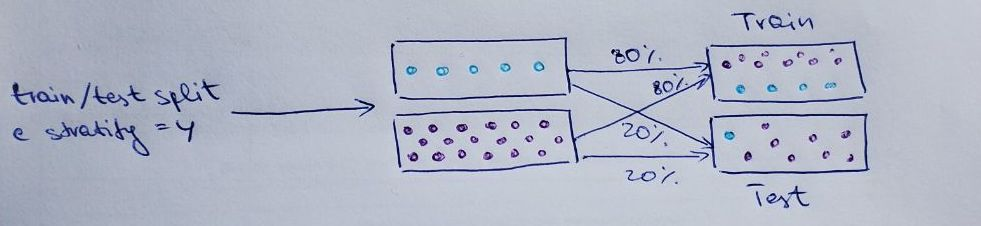
    
То есть, если соотношение классов в оригинальной выборке было 2:5, то в обучающей и валидационной выборках оно сохранится таким же. Такой подход в чем-то решает проблему несбалансированных классов.</div>

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

<a name="s_6"></a>
### Обучите модель на train-выборке двумя способами:логистической регрессией, случайным лесом.
[К оглавлению](#table_of_contents)


#### Логистическая регрессия

In [16]:
# зададим алгоритм для нашей модели
model = LogisticRegression(solver='liblinear')
# обучим модель
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
predictions = model.predict(X_test)
# бинарный прогноз
probabilities =  model.predict_proba(X_test)[:,1]

In [18]:
print('Accuracy : {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions)))

Accuracy : 0.93
Precision: 0.89
Recall: 0.84
F1: 0.87


#### Случайный лес 

In [19]:
# зададим алгоритм для нашей модели
scaler = StandardScaler()
# обучим модель
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [20]:
# Преобразуем обучающие и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [21]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators=100, random_state=0) 
# обучим модель случайного леса
rf_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:, 1]

In [22]:
print('Accuracy : {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, rf_predictions)))


Accuracy : 0.92
Precision: 0.88
Recall: 0.83
F1: 0.85


<a name="s_7"></a>
### Оцените метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. Какая модель показала себя лучше на основании метрик?.
[К оглавлению](#table_of_contents)


* Примерно в два раза метрики у логистической регрессии выше (только accuracy в один раз), чем у случайного леса.

Поэтому логистическая регрессия показала себя лучше.

<a name="stage_4"></a>
## ШАГ 4.  Сделайте кластеризацию клиентов
[К оглавлению](#table_of_contents)

<a name="s_8"></a>
### Стандартизируйте данные.
[К оглавлению](#table_of_contents)


In [23]:
sc = StandardScaler()
data_sc = data.drop('churn', axis=1)
x_sc=sc.fit_transform(data_sc)

<a name="s_9"></a>
### Постройте матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму. Внимание: отрисовка дендрограммы может занять время! На основании полученного графика предположите, какое количество кластеров можно выделить.
[К оглавлению](#table_of_contents)


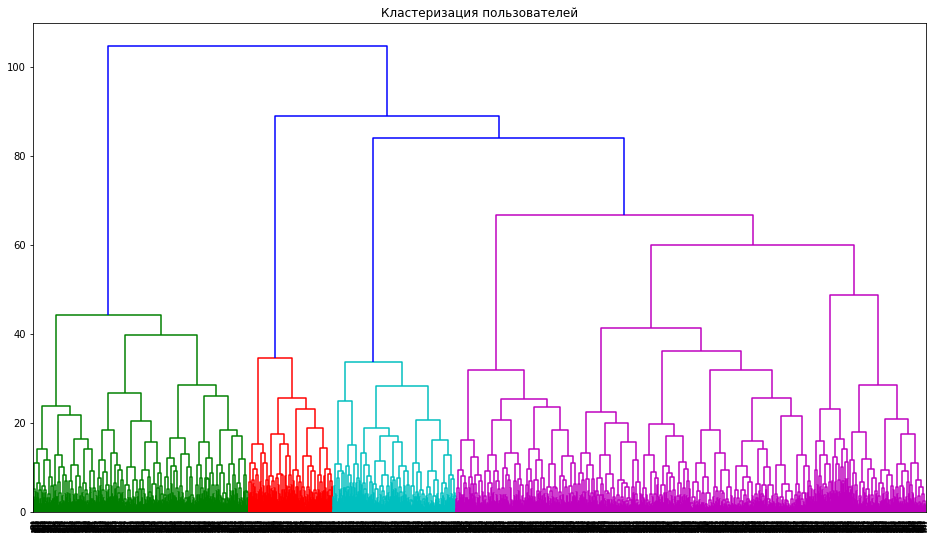

In [24]:
plt.figure(figsize=(16, 9))  
linked = linkage(x_sc, method='ward')
dendrogram(linked, orientation = 'top')
plt.title('Кластеризация пользователей')
plt.show()

Выделяется 4 цвета кластеров

<a name="s_10"></a>
### Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. Договоримся за число кластеров принять n=5, чтобы ваши результаты можно было сравнивать с результатами остальных студентов. Однако, конечно, в жизни никто не скажет вам правильный ответ, и решение остаётся за вами (на основании изучения графика из предыдущего пункта).
[К оглавлению](#table_of_contents)

In [25]:
# задаём модель k_means с числом кластеров 5
km = KMeans(n_clusters = 5, random_state=0)
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 2)
labels = km.fit_predict(data_sc)
# сохраняем метки кластера в поле датасета
data['cluster'] = labels

<a name="s_11"></a>
### Посмотрите на средние значения признаков для кластеров. Можно ли сразу что-то заметить?
[К оглавлению](#table_of_contents)


In [26]:
data.groupby('cluster').mean()


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster,,,,,,,,,,,,,,
0,0.514091,0.839650,0.451895,0.279883,0.897959,4.301263,0.407191,28.973761,105.932804,3.996113,3.544218,1.852564,1.708264,0.334305
1,0.511435,0.844075,0.495842,0.320166,0.902287,4.755717,0.423077,29.401247,174.873445,4.376299,3.749480,1.895200,1.785569,0.226611
2,0.468635,0.856089,0.516605,0.332103,0.926199,5.822878,0.431734,29.845018,356.481960,5.383764,4.420664,2.019260,2.009382,0.044280
3,0.508721,0.824612,0.488372,0.293605,0.907946,4.198643,0.387597,28.908915,35.600722,3.855620,3.394380,1.836755,1.692641,0.349806
4,0.521246,0.881020,0.511331,0.347025,0.898017,5.400850,0.433428,29.344193,250.984767,5.001416,4.169972,1.903480,1.843255,0.178470


* По уровню оттока "лидирует" - 4 кластер = 34.
    - Меньший контрактный период = 4.1.
    - Меньше групповых занятий = 38.
    - Меньше доп. трат = 35.
    - Посещаемость равна одному разу в неделю, и самая маленькая посещаемость в предыдущем месяце.
    - Прошло меньше времени с первого обращения в фитнес клуб.
* Меньше оттока во втором кластере = 03.

<a name="s_12"></a>
### Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним?
[К оглавлению](#table_of_contents)


Здесь я построил гистограммы по каждлому кластеру в отдельности, а далее будут графики с наслоением для лучшего сопостоавления по параметрам. Выводы по графикам будут дальше.

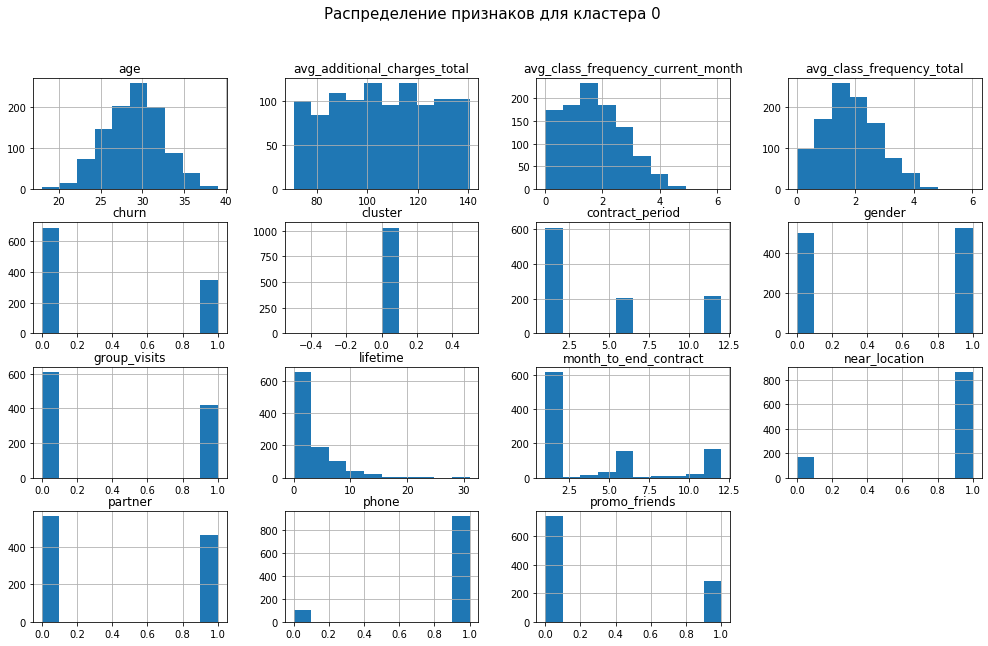

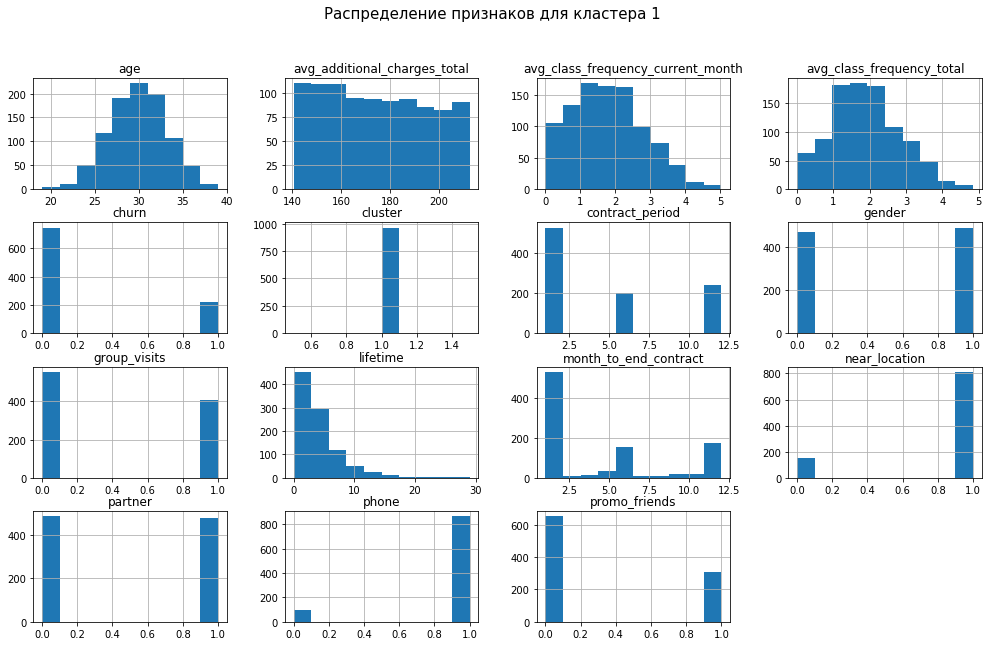

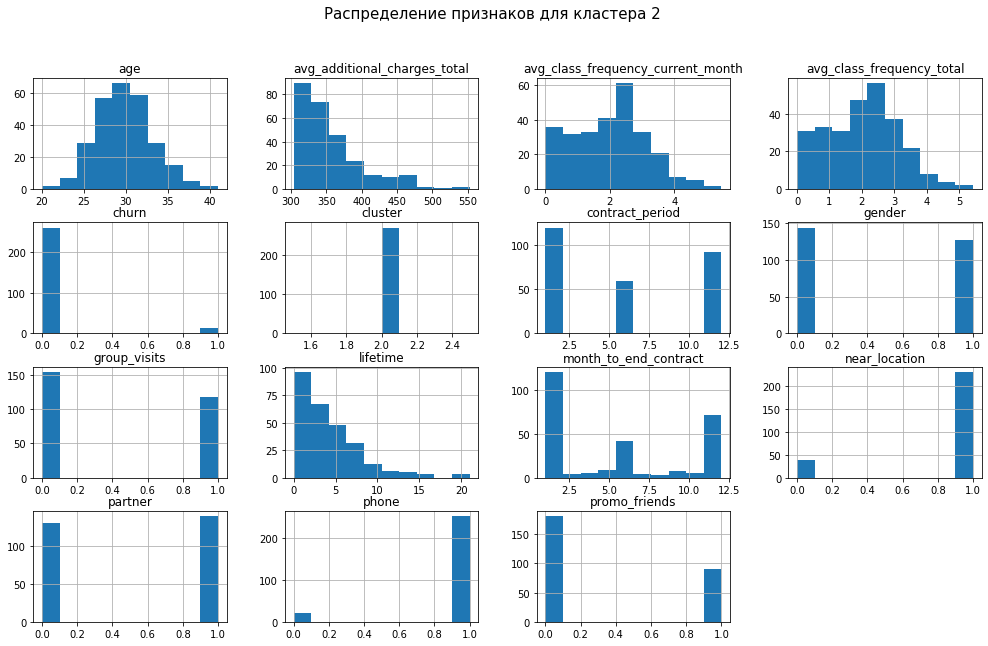

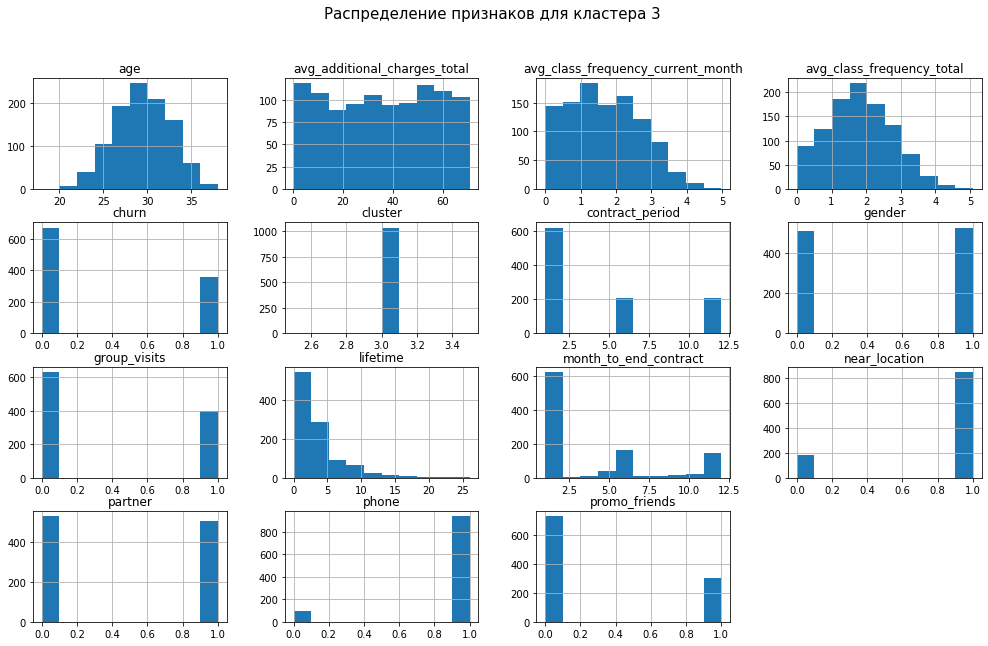

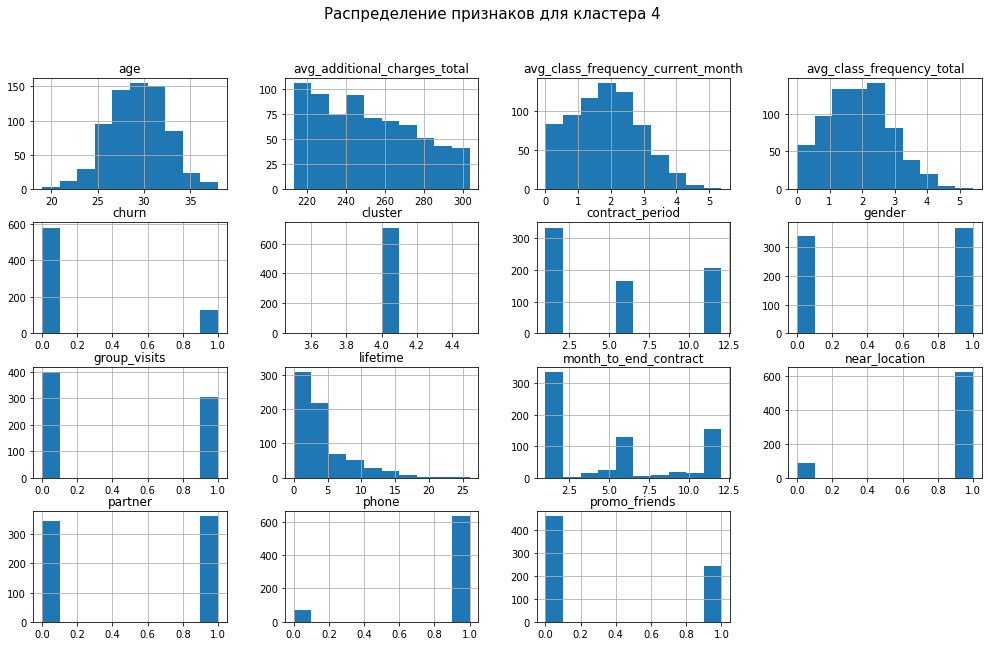

In [27]:
for value in [0, 1, 2, 3, 4]:
    data[data['cluster']==value].hist(figsize=(17,10))
    plt.suptitle('Распределение признаков для кластера {}'.format(value), fontsize = 15)
    plt.show()

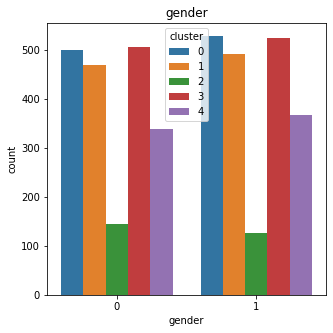

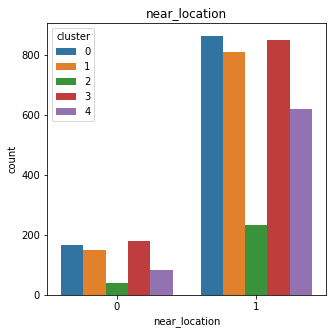

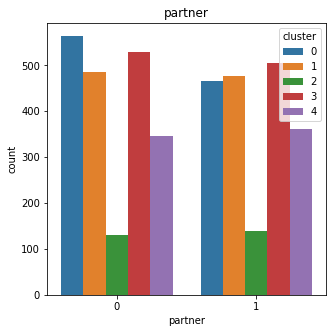

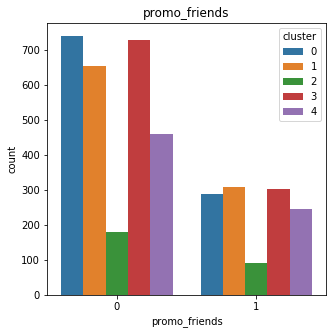

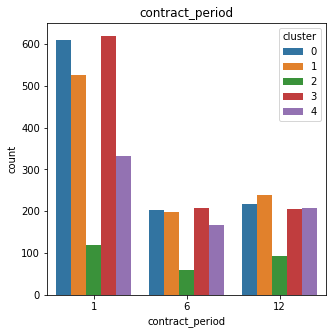

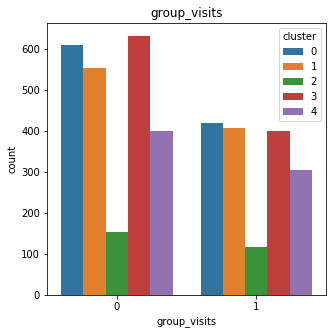

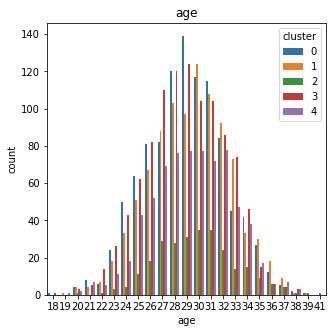

In [28]:
for column in ['gender', 'near_location', 'partner', 'promo_friends', 'contract_period', 'group_visits', 'age']:
    plt.figure(figsize=(5, 5))
    sns.countplot(x = data[column], hue='cluster', data=data)
    plt.title(column)
    plt.show()

Боксплоты по оставшимся параметрам:

Отдельный по возрасту:

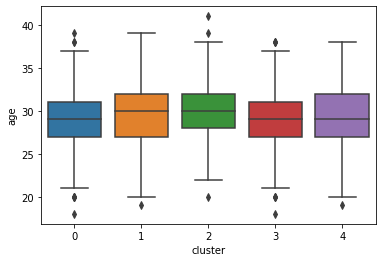

In [29]:
sns.boxplot(x='cluster', y = 'age', data=data)

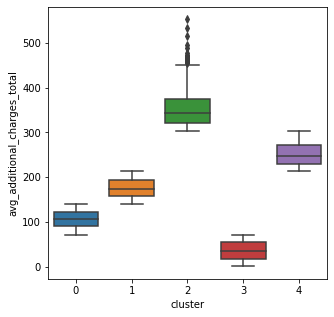

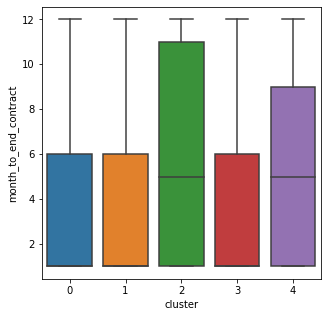

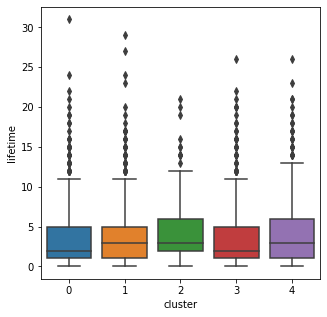

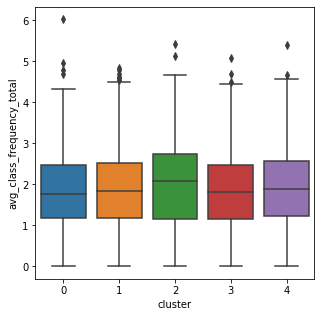

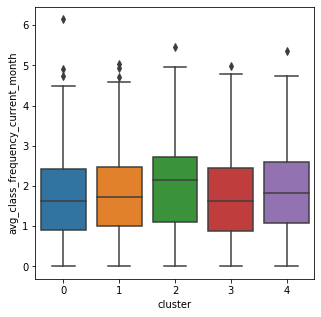

In [30]:
for column in ['avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']:
    plt.figure(figsize=(5, 5))
    sns.boxplot(x = 'cluster', y = data[column], data = data)
    plt.show()

### Выводы по графикам:
* Во всех кластерах равное количество мужчин и женщин,  остаются и уходят в равной степени.
* В кластерах 1 и 4 больше людей живут вблизи и больше из них остаются.
* В равной степени в компаниях-партнерах в класетрах остаются.
* От промо друзей зависит сколько людей останется и так во всех кластерах.
* 4 кластер больше берет абонемент на 1 месяц, меньше месячный абониментов у 2 кластера.
*  у 4 кластера больше групповых занятий (у тех кто остался)
* У 1 кластера больше людей с возрастом в 28 лет.
	* Но в среднем возраст однороден
* У 3 кластера больше доп. трат.
* У 3 кластера больше времени до окончания абонемента.
* Дольше остаются членами клуба клиенты кластера 1 и 5 , молодые и новые у 3 и 4.
* В среднем все кластеры находятся в диапозоне в 2 дня в неделю.
* Такой же показатель  и на предыдущий месяц.	 

<a name="s_13"></a>
### Для каждого полученного кластера посчитайте долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?
[К оглавлению](#table_of_contents)

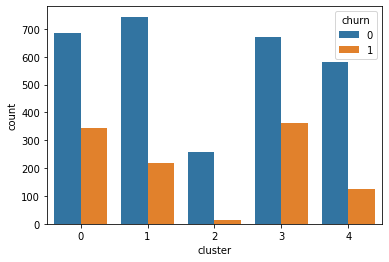

In [31]:
sns.countplot(x = 'cluster', hue='churn', data=data)

In [32]:
data.groupby('cluster').mean().T

cluster,0,1,2,3,4
gender,0.514091,0.511435,0.468635,0.508721,0.521246
near_location,0.839650,0.844075,0.856089,0.824612,0.881020
partner,0.451895,0.495842,0.516605,0.488372,0.511331
promo_friends,0.279883,0.320166,0.332103,0.293605,0.347025
phone,0.897959,0.902287,0.926199,0.907946,0.898017
contract_period,4.301263,4.755717,5.822878,4.198643,5.400850
group_visits,0.407191,0.423077,0.431734,0.387597,0.433428
age,28.973761,29.401247,29.845018,28.908915,29.344193
avg_additional_charges_total,105.932804,174.873445,356.481960,35.600722,250.984767
month_to_end_contract,3.996113,4.376299,5.383764,3.855620,5.001416


* Высокие оттоки у 1 и 4 кластеров на уровнях = 33 и 34
    * Самый низкий у 3 кластера = 04.
* Надежные кластеры 2, 3 и 5 кластеры. 22, 04, 17.
    * При этом у 3 кластера больше доп. трат = 356 - это самое большее число среди кластеров.
    * У 3 кластера всегда стабильные 2 дня в неделю.
    * Больший текущий контрактный период в 5 месяцев до окончания.
    * Посетители от 3 кластера приходят от компании-партнера + хороший показатель промо друзей.


Получается нужно более детально исследовать первый и пятый кластеры на причины оттока. И нужно исследовать успех 3 кластера.

<a name="stage_5"></a>
## Шаг 5. Сформулируйте выводы и сделайте базовые рекомендации по работе с клиентами
[К оглавлению](#table_of_contents)


### Выводы: 
1) По половому признаку почти одинаковое количество оставшихся и ушедших.

2) Остаются преимущественно те, кто живет рядом и приходят из компаний-партнеров.

3) Существует влияние от промо от друзей и компаний-партнеров - наверное отношения между коллегами.

4) Есть влияние от близости дома и промо от друзей - наверное отношения между соседями.

5) Оттока меньше если:
    - Чем больше срок абонемента, тем ниже вероятность оттока.
    
    - Возраст - чем старше, тем повышается заинтересованность.
    
    - Постоянность клиента понижает отток.
    
    - Групповые занятия.
    
    - Постояннство в посещении фитнеса в неделю.
----

Исходя и кластеризации, можно сделать вывод, что:
1) Выделяются кластеры с высоким оттоком если:
    - Обладатели мало срочных абонементов - на три месяца.
    
    - В неделю мало посещяют фитнес клуб.
    
    - Маленький процент промо от друзей.
    
    - Меньше вовлечены в групповые занятия
    
    - Мало доп. трат - но это и связано с тем, что они мало ходят в зал, т.к. похоже приходят не по наводке друзей или компании-партнера.

### Рекомендации:
1) Делать упор на долгосрочные абонементы - не делать их на месяц или три месяца - лучшая градация в полгода - год, а там соверешенстовать систему услуг:

    - Скидки по доп. платным услугам.
    
    - Ознакомительные групповые занятия.
    
        - Или сделать абонемент с преимуществом в групповые занятия.
        
2) Вовлекать больше компаний в программу компаний-партнеров - создавать особые корпоративные программы (в качестве тим. билдингу и т.п.)
    
3) Стремиться к увеличению недельной посещяемости - скидки, доп. услуги для тех кто, например, ходит по 3-5 раз в неделю целый месяц.
    
4) Мне кажется, что для людей "независимых" (те кто пришли не от друзей или компаний-партнеров) нужно тоже построить свою коммуникационную среду.
    
5) Больше взаимодействовать с местной городской-районной "комунной" - с целью привлечения большего количества людей, проживающих рядом. 